In [1]:
# Dependencies
import json
import pandas as pd
import numpy as np
import re

In [2]:
file_dir = 'C:/Users/jhkia/DATA/UCB_Challenge_Repos/M08 - ETL - Extract, Transform, Load/Movies_ETL/Resources'

In [3]:
# open wikipedia JSON file to be read
with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    # Variable to hold "list of dictionaries"
    wiki_movies_raw = json.load(file)

In [4]:
# check length of list
print(len(wiki_movies_raw))

# first 5 records
wiki_movies_raw[:5]

# last 5 records
wiki_movies_raw[-5:]

# last 5 records
wiki_movies_raw[3600:3605]

7311


[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [96]:
# Impport Kaggle data
kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}/ratings.csv')

In [6]:
kaggle_metadata.head()
kaggle_metadata.tail()
ratings.head()
ratings.tail()
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
44245,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,84720,tt0038387,en,The Brute Man,A facially deformed and mentally unhinged man ...,...,1946-10-01,0.0,58.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No woman was safe from his crushing arms...,The Brute Man,False,4.4,7.0
11744,False,NaN,50000000,"[{'id': 18, 'name': 'Drama'}]",NaN,11515,tt0455957,en,Goya's Ghosts,Painter Francisco Goya faces a scandal involvi...,...,2006-11-08,9448082.0,114.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Goya's Ghosts,False,6.6,100.0
31772,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://30for30.espn.com/film/four-days-in-octo...,54677,tt1734593,en,Four Days in October,"When the night of October 16, 2004 came to a m...",...,2010-10-05,0.0,53.0,[],Released,There was no answer to why not us,Four Days in October,False,6.6,4.0
24656,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,95874,tt0034328,en,Two-Faced Woman,"While at a ski lodge, Larry Blake sees instruc...",...,1941-11-30,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Love-laughs explode all over the place when Ga...,Two-Faced Woman,False,6.3,6.0
18147,False,NaN,250000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.likecrazy.com/,60420,tt1758692,en,Like Crazy,A British college student falls for an America...,...,2011-10-28,3542353.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,I Want You. I Need You. I Love You. I Miss You.,Like Crazy,False,6.5,386.0


In [7]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [8]:
# Use list comprehension to pull only movies with a director + IMDb link + are not tv shows
wiki_movies = [movie for movie in wiki_movies_raw 
               if ('Director' in movie or 'Directed by' in movie) 
               and 'imdb_link' in movie
              and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [9]:
# Looking at Data
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

7060    https://en.wikipedia.org/wiki/The_Insult_(film)
7293     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [10]:
# Sort column headers alphabetically
sorted(wiki_movies_df.columns.tolist())

['Actor control',
 'Adaptation by',
 'Alias',
 'Alma mater',
 'Also known as',
 'Animation by',
 'Arabic',
 'Area',
 'Area served',
 'Artist(s)',
 'Attraction type',
 'Audio format',
 'Author',
 'Based on',
 'Biographical data',
 'Bopomofo',
 'Born',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Characters',
 'Children',
 'Chinese',
 'Cinematography',
 'Closing date',
 'Color process',
 'Comics',
 'Composer(s)',
 'Coordinates',
 'Country',
 'Country of origin',
 'Cover artist',
 'Created by',
 'Date premiered',
 'Designer(s)',
 'Developed by',
 'Developer(s)',
 'Dewey Decimal',
 'Died',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Divisions',
 'Duration',
 'Edited by',
 'Editor(s)',
 'Ending theme',
 'Engine',
 'Engine(s)',
 'Executive producer(s)',
 'Family',
 'Fate',
 'Film(s)',
 'Followed by',
 'Format(s)',
 'Formerly',
 'Founded',
 'Founder',
 'Founders',
 'French',
 'Full name',
 'Gender',
 'Genre',
 'Genre(s)',
 'Genres',
 'Gwoyeu Romatzyh',
 'Ha

In [11]:
wiki_movies_df[wiki_movies_df['Traditional'].notnull()]['Traditional']

887          喜宴
1598       東宮西宮
6674        葉問3
6834         長城
6885    我們誕生在中國
Name: Traditional, dtype: object

In [12]:
# create a function to clean movie data
def clean_movie(movie):
    # movie_copy = dict(movie)
    movie = dict(movie) #create a non-destructive copy
    
    # Loop through all the 'alt title' headers and create a list of key-value pairs for each movie
    alt_titles = {}
    for key in ['Also known as', 'Arabic', 'Cantonese', 'Chinese', 'French', 'Hangul', 
                'Hebrew', 'Hepburn', 'Japanese', 'Literally', 'Mandarin', 'McCune–Reischauer', 
                'Original title', 'Polish', 'Revised Romanization', 'Romanized', 'Russian', 
                'Simplified', 'Traditional', 'Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
        
    # Function within the function to merge column names    
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
            
    # use function to rename/combine similar columns
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
    
    return movie

In [13]:
# Run our clean_movie function and see list of headers again
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [14]:
# Extract IMDb ID #
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))

# Using unique IMDb ID # - remove duplicate movies from our list
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [15]:
# See if there are any columns that are mostly just null values - in which case we can/should just remove
[[column, wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['imdb_id', 0]]

In [16]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [17]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Running time', 'Country', 'Language',
       'Budget', 'Box office', 'Director', 'Distributor', 'Editor(s)',
       'Composer(s)', 'Producer(s)', 'Production company(s)', 'Writer(s)',
       'imdb_id'],
      dtype='object')

In [18]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [19]:
box_office = wiki_movies_df['Box office'].dropna()
print(len(box_office))

5485


In [20]:
# Function to see if data is a string -- INSTEAD of using this, we can just use a Lambda function
# def is_not_a_string(x):
#     return type(x) != str

# Use function with .map to return all records that are not string
box_office[box_office.map(lambda x: type(x) != str)]
# Looking at the output, many of the datapoints are stored as 'lists'

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [21]:
# use .join string method to add spaces instead of commas
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)
box_office
# Now we see that there are a bunch of points with 'million' or 'billion' at the end. We'll import re at the top to use RegEx ('Regular Expressions')

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [22]:
# Regular Expression for parsing out $ value data above
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s*[mb]illi?on)'

In [33]:
# Check how many box office data points match form_one
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3909

In [34]:
# Check how many box office data points match form_two
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1559

In [35]:
# Create Boolean series corresponding to box_office values not matching either form one or two
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [36]:
# this will throw an error!
# box_office[(not matches_form_one) and (not matches_form_two)]

# INSTEAD try
box_office[~matches_form_one & ~matches_form_two]

600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3631                            TBA
3879       CN¥3.650 million (China)
4116                     £7,385,434
4306                            $30
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
Name: Box office, dtype: object

In [37]:
# Use .replace method to get rid of dollar ranges (keep the higher value)
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [38]:
# Create a function to turn the extracted values (objects) into numeric values (float)
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan
    
    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):
        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','',s)
        # convert to float and multiply by a million
        value = float(s) * 10**6
        # return value
        return value
    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):
        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','',s)
        # convert to float and multiply by a billion
        value = float(s) * 10**9
        # return value
        return value
    # if input is of the form $###,###,###
    elif re.match(form_two, s, flags=re.IGNORECASE):
        # remove dollar sign and commas
        s = re.sub('\$|,','',s)
        # convert to float
        value = float(s)
        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [40]:
# Create a new column and we will extract box office data using our function
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

# Drop old Box Office column
wiki_movies_df.drop('Box office', axis = 1, inplace=True)

# Review new column
wiki_movies_df['box_office'].head(10)

0    21400000.0
1     2700000.0
2    57718089.0
3     7331647.0
4     6939946.0
5           NaN
6           NaN
7           NaN
8           NaN
9      855810.0
Name: box_office, dtype: float64

In [41]:
# Now repurpose code for 'BUDGET' data
# create budget variable
budget = wiki_movies_df['Budget'].dropna()
print(len(budget))

4738


In [42]:
# Use function with .map to return all records that are not string
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [43]:
# remove any values between '$' sign and hyphen (for budgets in ranges):
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex = True)

# also need to remove any citation references (numbers in square brackets)
budget = budget.str.replace(r'\[\d+\]\s*', '', regex = True)

In [45]:
# Look for budget values not matching either form one or two
bud_matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
bud_matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~bud_matches_form_one & ~bud_matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5424                            N/A
5447                     £4 million
5671                    €14 million
5687                   $ dead link]
6385                  £ 12 million 
6593                     £3 

In [46]:
# Create a new column and we will extract budget data using our function
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

# Drop old Budget column
wiki_movies_df.drop('Budget', axis = 1, inplace=True)

# Review new column
wiki_movies_df['budget'].head(10)

0    20000000.0
1     6000000.0
2    35000000.0
3    12000000.0
4    25000000.0
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
Name: budget, dtype: float64

In [47]:
# Parse RELEASE DATES
# create variable to hold non-null release date values
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [48]:
# RegEx strings to capture 3 date formats
# 1 - Full month name, one- to two-digit day, four-digit year (i.e., January 1, 2000)
# 2 - Four-digit year, two-digit month, two-digit day, with any separator (i.e., 2000-01-01)
# 3 - Full month name, four-digit year (i.e., January 2000)
# 4 - Four-digit year

dform_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
dform_two = r'\d{4}.[01]\d.[0123]\d'
dform_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
dform_four = r'\d{4}'

In [49]:
# Extract dates and then 
# Use Pandas .to_datetime() to convert to datetime. Since there are different date formats, we'll need to set infer_datetime_format = True
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({dform_one}|{dform_two}|{dform_three}|{dform_four})', flags=re.IGNORECASE)[0], infer_datetime_format=True)

In [50]:
# drop original release date column
wiki_movies_df.drop('Release date', axis = 1, inplace = True)

# review new column
wiki_movies_df['release_date']

0      1990-07-11
1      1990-05-17
2      1990-08-10
3      1990-12-25
4      1990-12-19
          ...    
7071   2018-12-25
7072   2018-12-11
7073   2018-11-08
7074   2018-08-31
7075   2018-12-01
Name: release_date, Length: 7033, dtype: datetime64[ns]

In [51]:
# Parse RUNNING TIMES
# create variable to hold non-null running time values
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

# let's see how many are as simple/straightforward as 'x minutes'
running_time.str.contains(r'^\d*\s*minutes$', flags = re.IGNORECASE, na=False).sum()

6528

In [52]:
# Looking at what other formats there are
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags = re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [53]:
# let's see how many are as simple/straightforward as 'x m___'
running_time.str.contains(r'^\d*\s*m', flags = re.IGNORECASE, na=False).sum()

6877

In [54]:
# Looking at what other formats there are
running_time[running_time.str.contains(r'^\d*\s*m', flags = re.IGNORECASE, na=False) != True]

# we could remove the ^ and basically capture everything - but we need to make sure we're capturing the hours correctly

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [55]:
# create a regex to capture times stated in hours + minutes
hours_format = r'\d+\s*ho?u?r?s?\s*\d*'

In [56]:
# Extract total hours + minutes
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [57]:
# extraction above creates a dataframe with all string values
running_time_extract

,0,1,2
0,NaN,NaN,102
1,NaN,NaN,114
2,NaN,NaN,113
3,NaN,NaN,106
4,NaN,NaN,95
...,...,...,...
7071,NaN,NaN,90
7072,NaN,NaN,132
7073,NaN,NaN,120
7074,NaN,NaN,123


In [58]:
# Use pandas to_numeric method to convert data into numeric values. Need to use argument 'coerce' in order to turn empty strings into NaN, and then we can use fillna() to change NaN to zeros.
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)
running_time_extract

,0,1,2
0,0.0,0.0,102.0
1,0.0,0.0,114.0
2,0.0,0.0,113.0
3,0.0,0.0,106.0
4,0.0,0.0,95.0
...,...,...,...
7071,0.0,0.0,90.0
7072,0.0,0.0,132.0
7073,0.0,0.0,120.0
7074,0.0,0.0,123.0


In [59]:
# Convert hour capture group and minute capture group to minutes if the pure minutes capture group is zero -- save the output to wiki_movies_df
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis = 1)

# drop old running time column
wiki_movies_df.drop('Running time', axis=1, inplace=True)

# review newly added column
wiki_movies_df['running_time']

0       102.0
1       114.0
2       113.0
3       106.0
4        95.0
        ...  
7071     90.0
7072    132.0
7073    120.0
7074    123.0
7075     90.0
Name: running_time, Length: 7033, dtype: float64

In [97]:
# KAGGLE METADATA - check data
kaggle_metadata.dtypes
# We want to change the following:
# Adult -> Boolean
# ID -> numeric (integer)
# budget -> numeric (float)
# popularity -> numeric (float)
# video -> Boolean
# release_date -> datetime

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [98]:
# Adult -> Boolean
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [99]:
# Take a closer look at the 3 bad datapoints. looks like its all corrupted (not just adult column)
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
# Remove corrupted data. Might as well also remove adult videos as well from the hackathon
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult', axis='columns')

In [101]:
# video -> Boolean
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [102]:
# convert column into Boolean
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'
# if it matches string true, then the == will return a boolean True. Otherwise it will match string false in which case == 'True' will return a boolean False.

In [106]:
# ID -> numeric (integer)
# budget -> numeric (float)
# popularity -> numeric (float)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors = 'raise')
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int) # we can do the same as we did for id - but this way turns it to int32 which saves some memory
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors = 'raise')

In [104]:
# release_date -> datetime
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'], errors = 'raise')

In [107]:
kaggle_metadata.dtypes

belongs_to_collection            object
budget                            int32
genres                           object
homepage                         object
id                                int64
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                              bool
vote_average                    float64
vote_count                      float64
dtype: object

In [112]:
# KAGGLE RATINGS - check data
ratings.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [114]:
# convert timestamp to datetime for ratings data before we store it into our SQL table
# documentation says that the timestamp is in seconds after unix epoch
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit = 's')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

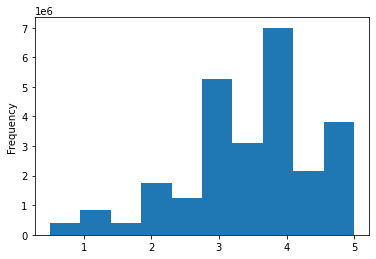

In [115]:
# explore ratings datapoints
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()